<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Visualização de Dados II
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Distribuições: Histograma, KDE e Box Plot;</li>
  <li>Correlação: Gráfico de Disperção e Mapa de Calor.</li>
</ol>

---

# **Exercícios**

Nestes exercícios, você deve decidir qual é o gráfico visto em aula que melhor visualiza uma base de dados. Após decidir, você deverá criar a visualização usando o conteúdo exposto durante a aula e adicionar um pequeno parágrafo sobre um insights que pode ser extraido do gráfico.

## 1\. Preços `outliers` de diamante

In [2]:
import seaborn as sns

data = sns.load_dataset("diamonds")
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


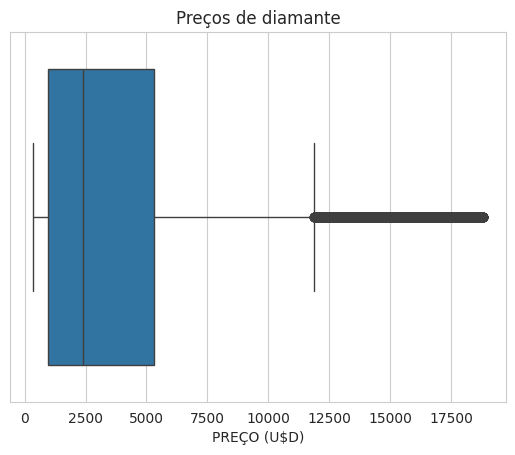

In [7]:
# gráfico do exercício 1

diamonds = data[['price']]
diamonds

with sns.axes_style('whitegrid'):
  grafico1 = sns.boxplot(x='price', data=diamonds)
  grafico1.set(title='Preços de diamante', xlabel='PREÇO (U$D)')

**Insight do gráfico 1**: ... # **Outliers** são pontos de dados que diferem do restante dos dados em um conjuto de dados, eles podem ser valores anormalmente altos ou baixos em comparação com a maioria dos dados. O grafico de boxplot é oque nos mostra isso nos preços dos diamantes, todos os valores acima de $12500  são considerados **outliers**

---

## 2\. Correlação entre o do preço do diamante com seu peso (`carat`) agrupados por sua transparêcia (`clarity`)

In [8]:
import seaborn as sns

data = sns.load_dataset("diamonds")
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<ipython-input-13-24ec79a1db47>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  diamonds_groupe = diamonds.groupby('clarity').mean().corr()


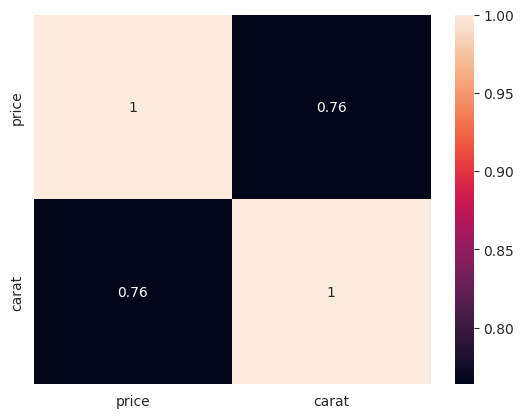

In [13]:
# gráfico do exercício 2

diamonds = data[['price', 'carat', 'clarity']]
diamonds_groupe = diamonds.groupby('clarity').mean().corr()
diamonds_groupe

with sns.axes_style('whitegrid'):
  grafico2  = sns.heatmap(diamonds_groupe, annot=True)


**Insight do gráfico 2**: # Como podemos ver no grafico do heatmap, o preço e o peso do diamante estão correlacionados. O peso em quilates (carats) é um dos fatores mais importantes, pois diamantes maiores são mais raros e, portanto, tendem a ter um valor mais alto.

---

## 3\. Distribuição contínua aproximada do peso (`weight`) de carros

In [14]:
import seaborn as sns

data = sns.load_dataset("mpg")
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


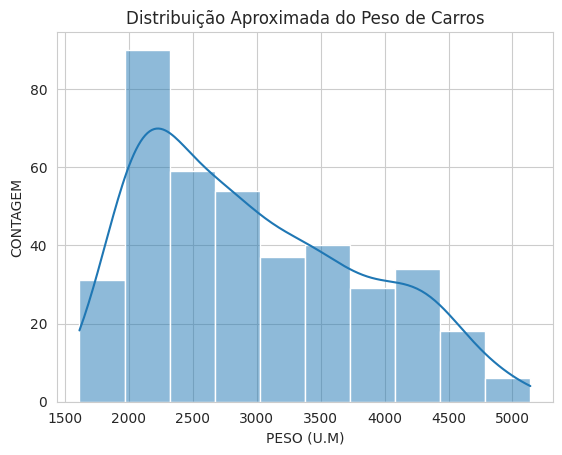

In [19]:
# gráfico do exercício 3

cars = data[['weight']]


with sns.axes_style('whitegrid'):
  grafico3 = sns.histplot(x='weight', data=cars, kde=True)
  grafico3.set(title='Distribuição Aproximada do Peso de Carros', xlabel='PESO (U.M)', ylabel='CONTAGEM')

**Insight do gráfico 3**: "Weight" é a palavra em inglês que significa "peso". Refere-se à medida da força com que a gravidade puxa um objeto em direção à Terra ou a outro corpo celeste. A distribuição do peso dos carros não segue uma distribuição normal, peso dos carros pode variar bastante dependendo do modelo, tipo e materiais utilizados na sua construção. Em geral, carros de passeio costumam pesar entre 1.000 kg e 1.800 kg. Veículos maiores, como SUVs e caminhonetes, podem pesar ainda mais, enquanto carros compactos e leves podem ter pesos abaixo de 1.000 kg. A probabilidade de haver carros de 2000 u.m até 3000 u.m. (unidades de massa) é bem maior a carros com mais de 4000 u.m como observamos nos dados desse grafico de histograma dos dados utilizados.


---